<a href="https://colab.research.google.com/github/doissegundos/Heart_Attack_Analysis_and_Prediction/blob/main/Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Attack Analysis and Prediction
Link do dataset: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


### Leitura dos dados

In [53]:
import numpy as np
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import sys
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
#Importando o dataset do Github
df = pd.read_csv('https://raw.githubusercontent.com/doissegundos/Heart_Attack_Analysis_and_Prediction/main/dataset/heart.csv')

As variaveis desse dataset são:
 - Age : Idade do Paciente

- Sex: Sexo do paciente

- exang: angina induzida por exercício (1 = sim; 0 = não)

- ca: número de navios principais (0-3)

- cp: tipo de dor no peito tipo de dor no peito

  - Valor 1: angina típica
  - Valor 2: angina atípica
  - Valor 3: dor não anginosa
  - Valor 4: assintomático
- trtbps: pressão arterial em repouso (em mm Hg)

- chol: colestoral em mg / dl obtido por meio do sensor de IMC

- fbs: (açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)

- rest_ecg: resultados eletrocardiográficos em repouso

  - Valor 0: normal
  - Valor 1: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão do ST> 0,05 mV)
  - Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada

- target: 0 = menos chance de ataque cardíaco 1 = mais chance de ataque cardíaco

In [3]:
#Exibe 10 linhas do dataset aleatoriamente
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1


In [4]:
#Faz uma descrição sobre algumas analises dos dados
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Verificando a possivel existencia de valores nulos dentro do dataset
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Organização dos dados 

#### trtbps - Pressão Arterial em repouso.

A pressão arterial saudável ideal para um adulto que está em repouso deve ser abaixo de 140/40 mmHg, logo vamos classificar a variavel trbps em dois grupos, sendo eles:
  - trtbps <= 140 - Pessoa Saldavel (0)
  - trtbps > 140 - Pessoa não Saldável (1)

In [6]:
df.trtbps

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trtbps, Length: 303, dtype: int64

In [7]:
# Definindo os valores em duas categorias
df.loc[df.trtbps <= 140, 'trtbps'] = 0
df.loc[df.trtbps > 140, 'trtbps'] = 1

In [8]:
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
59,57,0,0,0,303,0,0,159,0,0.0,2,1,2,1
50,51,0,2,0,256,0,0,149,0,0.5,2,0,2,1
283,40,1,0,1,223,0,1,181,0,0.0,2,0,3,0
199,65,1,0,0,248,0,0,158,0,0.6,2,2,1,0
302,57,0,1,0,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df.trtbps.describe()

count    303.000000
mean       0.214521
std        0.411169
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: trtbps, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



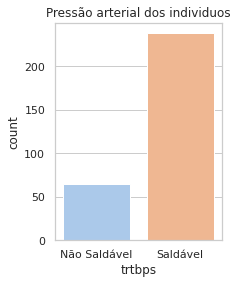

In [16]:
# #Visualização da váriavel trtbps
# df1 = df
# # Definindo os valores em duas categorias
# df1.loc[df1.trtbps == 0, 'trtbps'] = "Saldável"
# df1.loc[df1.trtbps == 1, 'trtbps'] = "Não Saldável"

# plt.figure(figsize=(3, 4))
# sns.set_theme(style="whitegrid")
# sns.countplot('trtbps',data=df1,palette="pastel")
# plt.title('Pressão arterial dos individuos') 
# plt.show()

#### chol - Nivel de colesterol

Os valores considerados normais devem ser estar em torno de 200mg/dL; Ligeiramente altos quando estão entre 200 e 239 mg/dL e altos quando estão acima de 240 mg/dL, logo vamos classificar a variavel chrol em 4 grupos, sendo eles:
  - chol <= 180 - Colesterol Baixo (0)
  - chol > 180 and chol <= 200 - Colesterol Ideal (1)
  - chol > 200 and chol < 240 - Colesterol levemente alto (2)
  - chol >= 240 - Colesterol alto (3)

In [10]:
df['cholc']=pd.cut(
   df['chol'],
   bins=[0, 180, 200, 240, sys.maxsize],
   labels=['0', '1', '2', '3']
)

In [11]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cholc
0,63,1,3,1,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,0,250,0,1,187,0,3.5,0,0,2,1,3
2,41,0,1,0,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,0,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,0,354,0,1,163,1,0.6,2,0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0,241,0,1,123,1,0.2,1,0,3,0,3
299,45,1,3,0,264,0,1,132,0,1.2,1,0,3,0,3
300,68,1,0,1,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,0,131,0,1,115,1,1.2,1,1,3,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



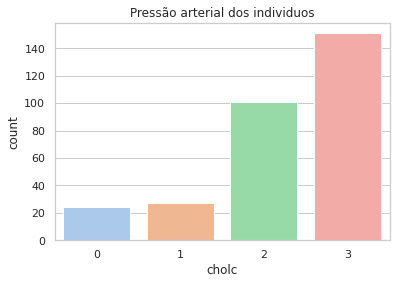

In [12]:
#Visualização da váriavel trtbps
df1 = df
# Definindo as categorias 
df1['cholcv']=pd.cut(
   df1['chol'],
   bins=[0, 180, 200, 240, sys.maxsize],
   labels=['Chol Baixo', 'Chol Ideal', 'Chol lev. alto', 'chol alto']
)

plt.figure(figsize=(6, 4))
sns.set_theme(style="whitegrid")
sns.countplot('cholc',data=df1,palette="pastel")
plt.title('Pressão arterial dos individuos') 
plt.show()

#### Age - idade

Vamos dividir a idade em 4 categorias:
  - age <= 45 - 0
  - age > 45 and age <=55 - 1
  - age > 55 and age <= 65 - 2
  - age > 65 - 3

In [13]:
df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [14]:
df['agec']=pd.cut(
   df['age'],
   bins=[0, 45, 55, 65, sys.maxsize],
   labels=['0', '1', '2', '3']
)

In [15]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cholc,cholcv,agec
0,63,1,3,1,233,1,0,150,0,2.3,0,0,1,1,2,Chol lev. alto,2
1,37,1,2,0,250,0,1,187,0,3.5,0,0,2,1,3,chol alto,0
2,41,0,1,0,204,0,0,172,0,1.4,2,0,2,1,2,Chol lev. alto,0
3,56,1,1,0,236,0,1,178,0,0.8,2,0,2,1,2,Chol lev. alto,2
4,57,0,0,0,354,0,1,163,1,0.6,2,0,2,1,3,chol alto,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0,241,0,1,123,1,0.2,1,0,3,0,3,chol alto,2
299,45,1,3,0,264,0,1,132,0,1.2,1,0,3,0,3,chol alto,0
300,68,1,0,1,193,1,1,141,0,3.4,1,2,3,0,1,Chol Ideal,3
301,57,1,0,0,131,0,1,115,1,1.2,1,1,3,0,0,Chol Baixo,2


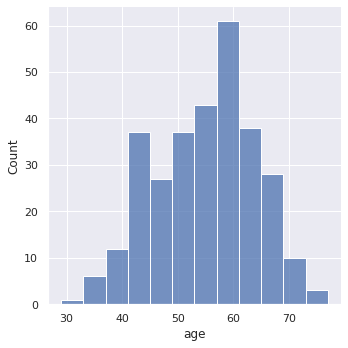

In [16]:
#Distribuição da idade dos individuos
sns.set_theme(style="darkgrid")
sns.displot(data=df, x="age")

### Classificação 

Separando os dados em treino e teste

In [20]:
x_df = df[['agec','sex','cp','trtbps','fbs','restecg','exng','slp','caa','thall','cholc']]
y_df = df['output']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_df,y_df)

#### KNN

In [26]:
#utilizando o Knn
knn = KNeighborsClassifier(n_neighbors=3)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
acuracia = knn.score(X_test,y_test)
print("A acuracia do knn é: "+str(acuracia))

0.8157894736842105

#### Arvore de decisão

In [49]:
#Definindo a arvore de decisão
Tree_clf=DecisionTreeClassifier(max_depth=7)
acuracia_med=[]

In [50]:
Tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
acuracia = Tree_clf.score(X_test,y_test)
print("A acuracia da arvore de decisão é: "+str(acuracia))

A acuracia da arvore de decisão é:0.7631578947368421


#### MLP

In [54]:
MLP_clf=MLPClassifier((100,100),activation='relu',early_stopping=True)

In [55]:
MLP_clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [56]:
acuracia = MLP_clf.score(X_test,y_test)
print("A acuracia dO MLP é: "+str(acuracia))

A acuracia dO MLP é: 0.7631578947368421
